In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
SEED=2020

def basic_details(df):
    """Returns basic statistics for dataset - % of zero, nan, unique values, mean, median and standard deviation."""
    b = pd.DataFrame()
    b['Missing value, %'] = round(df.isnull().sum()/df.shape[0]*100, 2)
    b['Zero value, %'] = round(df.isin([0]).sum() /df.shape[0]*100, 2)
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    b.loc[numeric_cols, 'Mean'] = df[numeric_cols].mean().round(2)
    b.loc[numeric_cols, 'Median'] = df[numeric_cols].median().round(2)
    b.loc[numeric_cols, 'Std'] = df[numeric_cols].std().round(2)
    return b

# Завантаження даних з CSV-файлів
users_activity = pd.read_csv("Users’ Activity.csv")
users = pd.read_csv("Users.csv")
streamers = pd.read_csv("Streamers.csv")

# Функція для перевірки та видалення дублікатів
def remove_duplicates(df, name):
    duplicates = df.duplicated().sum()
    print(f'Кількість дублікатів у таблиці {name}: {duplicates}')
    if duplicates > 0:
        df = df.drop_duplicates()
    return df

# Перевірка та видалення дублікатів для кожної таблиці
users_activity = remove_duplicates(users_activity, "Users' Activity")
users = remove_duplicates(users, "Users")
streamers = remove_duplicates(streamers, "Streamers")

# Перевірка розмірів таблиць після очищення
print(f'Users\' Activity після очищення: {users_activity.shape}')
print(f'Users після очищення: {users.shape}')
print(f'Streamers після очищення: {streamers.shape}')


Кількість дублікатів у таблиці Users' Activity: 0
Кількість дублікатів у таблиці Users: 0
Кількість дублікатів у таблиці Streamers: 0
Users' Activity після очищення: (922921, 7)
Users після очищення: (10395, 6)
Streamers після очищення: (1224, 10)


In [2]:
# Додавання префіксів до колонок
# Префікси для ознак користувачів
users.columns = ['user_' + col if col != 'userId' else 'userId' for col in users.columns]

# Префікси для ознак стрімерів
streamers.columns = ['streamer_' + col if col != 'streamerId' else 'streamerId' for col in streamers.columns]

# Префікси для ознак події (тільки ознаки, які є специфічними для подій)
users_activity = users_activity.rename(columns={
    'date': 'event_date',
    'timestamp': 'event_timestamp',
    'event': 'event_type',
    'streamId': 'event_streamId',
    'coins_spent_on_gift': 'event_coins_spent_on_gift'
})

# Створення цільової змінної
users_activity['event_sent_gift'] = users_activity['event_type'].apply(lambda x: 1 if x == 'user sent gift' else 0)

# Об'єднання даних за userId і streamerId
merged_data = pd.merge(users_activity, streamers, on='streamerId', how='left')
merged_data = pd.merge(merged_data, users, on='userId', how='left')

# Перегляд нової таблиці з префіксами
print(merged_data.columns)
merged_data.head()



Index(['event_date', 'event_timestamp', 'userId', 'streamerId', 'event_type',
       'event_streamId', 'event_coins_spent_on_gift', 'event_sent_gift',
       'streamer_install_date', 'streamer_registration_date',
       'streamer_gender', 'streamer_streamer_type', 'streamer_followers',
       'streamer_coins_earned_all_time', 'streamer_avg_stream_duration',
       'streamer_avg_watchers_per_stream',
       'streamer_avg_earned_coins_per_stream', 'user_install_date',
       'user_registration_date', 'user_gender', 'user_followings',
       'user_media_source'],
      dtype='object')


,event_date,event_timestamp,userId,streamerId,event_type,event_streamId,event_coins_spent_on_gift,event_sent_gift,streamer_install_date,streamer_registration_date,streamer_gender,streamer_streamer_type,streamer_followers,streamer_coins_earned_all_time,streamer_avg_stream_duration,streamer_avg_watchers_per_stream,streamer_avg_earned_coins_per_stream,user_install_date,user_registration_date,user_gender,user_followings,user_media_source
0,2022-10-02,2022-10-02 16:46:33,62699531cbde3a0d5bfa5bd4,61f95f64a2f894c483b71574,user started to follow streamer,non-stream,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,2022-04-27,iPreferNotToSay,14.0,googleadwords_int
1,2022-10-02,2022-10-01 23:59:30,63316b6dd177d176c106053f,62b0e29c7a0cc5d5c05367b1,user opened stream,6338ce2a08aa4f2581acba95,NaN,0,2022-06-20,2022-06-20,female,Official,3173.0,11010.0,11.71,113.30,64.45,2022-09-26,2022-09-26,iPreferNotToSay,31.0,Organic
2,2022-10-02,2022-10-01 23:59:30,6338263c94c9c82f2a49af21,6294544403012045e03a768a,user opened stream,6338ce2094c9c82f2a49e15b,NaN,0,2022-05-30,2022-05-30,female,Official,13136.0,52211.0,71.54,306.43,348.19,2022-10-01,2022-10-01,female,6.0,Organic
3,2022-10-02,2022-10-02 00:00:03,6296e20803012003b83b7a70,6336ec7230b4f027e73af54b,user closed stream,6338d42494c9c82f2a49e2c1,NaN,0,2022-09-30,2022-09-30,female,Official,135.0,341.0,8.96,94.77,13.12,2022-06-01,2022-06-15,male,3318.0,Organic
4,2022-10-02,2022-10-01 23:59:33,63137235f613be54f9b6ca86,6294544403012045e03a768a,user opened stream,6338ce2094c9c82f2a49e15b,NaN,0,2022-05-30,2022-05-30,female,Official,13136.0,52211.0,71.54,306.43,348.19,2022-09-03,2022-09-03,iPreferNotToSay,134.0,Organic


In [3]:
# Перетворюємо дату та часовий штамп у формат datetime
# Далі будемо використовувати дату інсталяції замість реєстрації через відсутність NaN у таких даних
merged_data['event_date'] = pd.to_datetime(merged_data['event_date'])
merged_data['event_timestamp'] = pd.to_datetime(merged_data['event_timestamp'])
# merged_data['user_registration_date'] = pd.to_datetime(merged_data['user_registration_date'])
# merged_data['streamer_registration_date'] = pd.to_datetime(merged_data['streamer_registration_date'])
merged_data['user_install_date'] = pd.to_datetime(merged_data['user_install_date'])
merged_data['streamer_install_date'] = pd.to_datetime(merged_data['streamer_install_date'])


# Обчислення кількості днів з дати інсталяції до дати події
# Кількість днів для користувачів
merged_data['days_since_user_install'] = (merged_data['event_date'] - merged_data['user_install_date']).dt.days

# Кількість днів для стрімерів
merged_data['days_since_streamer_install'] = (merged_data['event_date'] - merged_data['streamer_install_date']).dt.days
# Заміна 0 днів на 1 для уникнення ділення на 0
merged_data['days_since_streamer_install'] = merged_data['days_since_streamer_install'].replace(0, 1)

# Обчислення середніх значень коінів на день для стрімерів
merged_data['coins_per_day_streamer'] = merged_data['streamer_coins_earned_all_time'] / merged_data['days_since_streamer_install']


# Видалення первинних ознак

merged_data = merged_data.drop(columns=[
    'event_date',              # Дату події видаляємо після отримання нових ознак (строк існування стрімерів та користувачів)
    'event_timestamp',         # Часову мітку видаляємо після отримання нових ознак (строк існування стрімерів та користувачів)
    'event_type',              # Тип події не використовується для моделі, таргет вже сформовано. Інші типи подій, як-от 'user opened stream', 'user closed stream' тощо, не допоможуть у передбаченні того, чи відправить користувач подарунок.
    'event_streamId',          # Видаляємо event_streamId, оскільки це динамічна та недоступна заздалегідь ознака. Ми не можемо закладати в модель поведінку користувача поза стрімом, оскільки це невідомо на момент рекомендації.
    'event_coins_spent_on_gift', # Кількість витрачених коінів відома тільки після події
    'user_registration_date',  # Дата реєстрації користувача — видаляємо після розрахунку строку існування
    'user_install_date',       # Дата інсталяції користувача не потрібна - використовуємо дату реєстрації
    'streamer_registration_date', # Дата реєстрації стрімера — видаляємо після розрахунку строу існування
    'streamer_install_date'    # Дата інсталяції стрімера не потрібна - - використовуємо дату реєстрації
])

# Перегляд оброблених даних
print(merged_data.columns)
merged_data.head()


Index(['userId', 'streamerId', 'event_sent_gift', 'streamer_gender',
       'streamer_streamer_type', 'streamer_followers',
       'streamer_coins_earned_all_time', 'streamer_avg_stream_duration',
       'streamer_avg_watchers_per_stream',
       'streamer_avg_earned_coins_per_stream', 'user_gender',
       'user_followings', 'user_media_source', 'days_since_user_install',
       'days_since_streamer_install', 'coins_per_day_streamer'],
      dtype='object')


,userId,streamerId,event_sent_gift,streamer_gender,streamer_streamer_type,streamer_followers,streamer_coins_earned_all_time,streamer_avg_stream_duration,streamer_avg_watchers_per_stream,streamer_avg_earned_coins_per_stream,user_gender,user_followings,user_media_source,days_since_user_install,days_since_streamer_install,coins_per_day_streamer
0,62699531cbde3a0d5bfa5bd4,61f95f64a2f894c483b71574,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPreferNotToSay,14.0,googleadwords_int,158,NaN,NaN
1,63316b6dd177d176c106053f,62b0e29c7a0cc5d5c05367b1,0,female,Official,3173.0,11010.0,11.71,113.30,64.45,iPreferNotToSay,31.0,Organic,6,104.0,105.865385
2,6338263c94c9c82f2a49af21,6294544403012045e03a768a,0,female,Official,13136.0,52211.0,71.54,306.43,348.19,female,6.0,Organic,1,125.0,417.688000
3,6296e20803012003b83b7a70,6336ec7230b4f027e73af54b,0,female,Official,135.0,341.0,8.96,94.77,13.12,male,3318.0,Organic,123,2.0,170.500000
4,63137235f613be54f9b6ca86,6294544403012045e03a768a,0,female,Official,13136.0,52211.0,71.54,306.43,348.19,iPreferNotToSay,134.0,Organic,29,125.0,417.688000


In [4]:
# NaN-значенния в ознаках 
basic_details(merged_data)

,"Missing value, %","Zero value, %",N unique value,dtype,Mean,Median,Std
userId,0.00,0.00,10395,object,NaN,NaN,NaN
streamerId,0.00,0.00,4187,object,NaN,NaN,NaN
event_sent_gift,0.00,99.72,2,int64,0.00,0.00,0.05
streamer_gender,0.80,0.00,3,object,NaN,NaN,NaN
streamer_streamer_type,0.80,0.00,2,object,NaN,NaN,NaN
streamer_followers,3.66,0.00,340,float64,20915.56,6961.00,33914.90
streamer_coins_earned_all_time,0.80,7.02,287,float64,131503.38,31821.00,284645.93
streamer_avg_stream_duration,0.80,0.00,393,float64,16.65,9.27,17.93
streamer_avg_watchers_per_stream,0.80,0.00,581,float64,122.48,82.50,117.51
streamer_avg_earned_coins_per_stream,0.80,7.02,310,float64,114.59,55.81,214.39


In [5]:
# Видаляємо всі рядки, де більше 8 значень NaN
merged_data = merged_data[merged_data.isna().sum(axis=1) <= 8]

# Коментар:
# Видаляємо всі рядки, де в понад 7 стовпцях є значення NaN.
# Це дозволяє позбутися неповних даних, де багато відсутніх значень, 
# що покращить якість даних для моделі.

# Припущення: У колонках user_followings/streamer_followers значення NaN означає, що користувач не має жодної підписки.
# Тому NaN замінюємо на 0, що відображатиме відсутність підписок.
merged_data['user_followings'].fillna(0, inplace=True)
merged_data['streamer_followers'].fillna(0, inplace=True)

In [6]:
# Використовуємо One-Hot Encoding для категоріальних ознак з невеликою кількістю унікальних значень і перетворюємо True/False у 1/0
data = pd.get_dummies(merged_data, columns=['streamer_gender', 'streamer_streamer_type', 'user_gender', 'user_media_source'])

# Перетворюємо всі значення True/False у 1/0
data = data.astype({col: 'int' for col in data.select_dtypes(include='bool').columns})

# Перевіряємо результат
data.head()

,userId,streamerId,event_sent_gift,streamer_followers,streamer_coins_earned_all_time,streamer_avg_stream_duration,streamer_avg_watchers_per_stream,streamer_avg_earned_coins_per_stream,user_followings,days_since_user_install,days_since_streamer_install,coins_per_day_streamer,streamer_gender_female,streamer_gender_iPreferNotToSay,streamer_gender_male,streamer_streamer_type_Individual,streamer_streamer_type_Official,user_gender_female,user_gender_iPreferNotToSay,user_gender_male,user_media_source_Facebook Ads,user_media_source_Organic,user_media_source_bytedanceglobal_int,user_media_source_googleadwords_int,user_media_source_restricted,user_media_source_snapchat_int
1,63316b6dd177d176c106053f,62b0e29c7a0cc5d5c05367b1,0,3173.0,11010.0,11.71,113.30,64.45,31.0,6,104.0,105.865385,1,0,0,0,1,0,1,0,0,1,0,0,0,0
2,6338263c94c9c82f2a49af21,6294544403012045e03a768a,0,13136.0,52211.0,71.54,306.43,348.19,6.0,1,125.0,417.688000,1,0,0,0,1,1,0,0,0,1,0,0,0,0
3,6296e20803012003b83b7a70,6336ec7230b4f027e73af54b,0,135.0,341.0,8.96,94.77,13.12,3318.0,123,2.0,170.500000,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4,63137235f613be54f9b6ca86,6294544403012045e03a768a,0,13136.0,52211.0,71.54,306.43,348.19,134.0,29,125.0,417.688000,1,0,0,0,1,0,1,0,0,1,0,0,0,0
5,6275bb0b06a266db4c41b7f7,6336ec7230b4f027e73af54b,0,135.0,341.0,8.96,94.77,13.12,144.0,148,2.0,170.500000,1,0,0,0,1,0,1,0,0,0,0,1,0,0


In [7]:
basic_details(data)

,"Missing value, %","Zero value, %",N unique value,dtype,Mean,Median,Std
userId,0.0,0.00,10363,object,NaN,NaN,NaN
streamerId,0.0,0.00,1096,object,NaN,NaN,NaN
event_sent_gift,0.0,99.72,2,int64,0.00,0.00,0.05
streamer_followers,0.0,2.88,341,float64,20312.45,6277.00,33605.12
streamer_coins_earned_all_time,0.0,7.08,287,float64,131503.38,31821.00,284645.93
streamer_avg_stream_duration,0.0,0.00,393,float64,16.65,9.27,17.93
streamer_avg_watchers_per_stream,0.0,0.00,581,float64,122.48,82.50,117.51
streamer_avg_earned_coins_per_stream,0.0,7.08,310,float64,114.59,55.81,214.39
user_followings,0.0,31.08,1020,float64,566.05,31.00,1572.19
days_since_user_install,0.0,17.64,228,int64,64.14,50.00,61.95


In [8]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report

# Розділяємо дані на ознаки (X) та цільову змінну (y)
X = data.drop(columns=['event_sent_gift', 'userId', 'streamerId'])  # Вилучаємо айдішники та цільову змінну
y = data['event_sent_gift']  # Цільова змінна

# Обрізка більшого класу до розміру меншинного класу
X_majority = X[y == 0]
y_majority = y[y == 0]
X_minority = X[y == 1]
y_minority = y[y == 1]

# Обрізаємо більший клас до розміру меншинного
X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority,
                                                          replace=False,
                                                          n_samples=len(y_minority),  # Обрізаємо до розміру меншинного класу
                                                          random_state=SEED)

# Об'єднуємо обидва класи назад у збалансований набір даних
X_balanced = pd.concat([X_minority, X_majority_downsampled])
y_balanced = pd.concat([y_minority, y_majority_downsampled])

# Створюємо модель логістичної регресії
log_reg = LogisticRegression(solver='liblinear')

# Крос-валідація з 5 фолдами
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
y_pred = cross_val_predict(log_reg, X_balanced, y_balanced, cv=cv)

# Виводимо метрики
print(classification_report(y_balanced, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.69      0.61      2600
           1       0.57      0.41      0.48      2600

    accuracy                           0.55      5200
   macro avg       0.56      0.55      0.54      5200
weighted avg       0.56      0.55      0.54      5200



### Примітка щодо виявленої проблеми у вихідному ноутбуці

У старій версії ноутбука було виявлено суттєву методологічну помилку, яка могла негативно вплинути на результати моделювання. Проблема полягала в тому, що балансування класів за допомогою техніки downsampling виконувалося **до розділення даних на train/test**, що призводить до витоку інформації (data leakage). У такій конфігурації модель отримує непряму інформацію про розподіл цільової змінної, що робить результати крос-валідації та метрики недостовірними. Даний фрагмент коду збережено як приклад вихідного рішення, однак його результати не можуть вважатися коректними з точки зору машинного навчання.


In [9]:
from sklearn.ensemble import RandomForestClassifier


# Створюємо модель Random Forest
rf_clf = RandomForestClassifier(random_state=SEED, n_jobs=-1)

# Крос-валідація з 5 фолдами
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
y_pred = cross_val_predict(rf_clf, X_balanced, y_balanced, cv=cv)

# Виведення метрик: точність, повнота, f1-score
print(classification_report(y_balanced, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2600
           1       0.80      0.80      0.80      2600

    accuracy                           0.80      5200
   macro avg       0.80      0.80      0.80      5200
weighted avg       0.80      0.80      0.80      5200



In [10]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Створюємо модель XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED)

# Крос-валідація з 5 фолдами
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
y_pred = cross_val_predict(xgb_clf, X_balanced, y_balanced, cv=cv)

# Виведення метрик: точність, повнота, f1-score
print(classification_report(y_balanced, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2600
           1       0.81      0.83      0.82      2600

    accuracy                           0.82      5200
   macro avg       0.82      0.82      0.82      5200
weighted avg       0.82      0.82      0.82      5200



In [ ]:
# Модель XGBoost показала найкращий результат у порівнянні з іншими моделями.
# Оптимізація гіперпараметрів за допомогою Optuna не покращила результат f1,
# що свідчить про те, що базові налаштування моделі XGBoost уже були оптимальними для цієї задачі.


In [11]:
from sklearn.model_selection import train_test_split


# Сохраняем соответствующие userId и streamerId для сбалансированных данных
userId_balanced = merged_data.loc[X_balanced.index, 'userId']
streamerId_balanced = merged_data.loc[X_balanced.index, 'streamerId']

# Розділяємо дані на 90% тренувальних і 10% тестових (тільки X і y)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.1, random_state=SEED)

# Розділяємо відповідні userId і streamerId для тих же індексів
userId_train, userId_test = train_test_split(userId_balanced, test_size=0.1, random_state=SEED)
streamerId_train, streamerId_test = train_test_split(streamerId_balanced, test_size=0.1, random_state=SEED)

# Навчання моделі на тренувальних даних
xgb_clf.fit(X_train, y_train)

# Передбачення на тестових даних у вигляді ймовірностей
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]  # Витягаємо ймовірність класу 1

# Встановлюємо поріг для рекомендацій
threshold = 0.7  # Наприклад, поріг 0.7

# Створюємо датафрейм з ймовірностями і рекомендаціями
recommendations = pd.DataFrame({
    'userId': userId_test,
    'streamerId': streamerId_test,
    'predicted_probability': y_pred_proba
})

# Фільтруємо рекомендації на основі встановленого порога
recommended_pairs = recommendations[recommendations['predicted_probability'] >= threshold]

# Виводимо приклади рекомендацій
recommended_pairs.head()


,userId,streamerId,predicted_probability
21274,6317f4a0df48426ffe694d30,630407c0ab766d4d8ff89ffa,0.986495
542121,6273c7ba06a266af56400dd9,6335968b38c52fb3346e8a0b,0.784159
494432,62a72c6ce7b384fee988c2ee,62f676971e7906dffd066ea1,0.981748
432943,6339fa5294c9c82f2a4a473c,63369bee30b4f027e73aed42,0.822188
495073,632cd7a7b3a133545fe4177a,6241b2afed27fe10477308da,0.952169


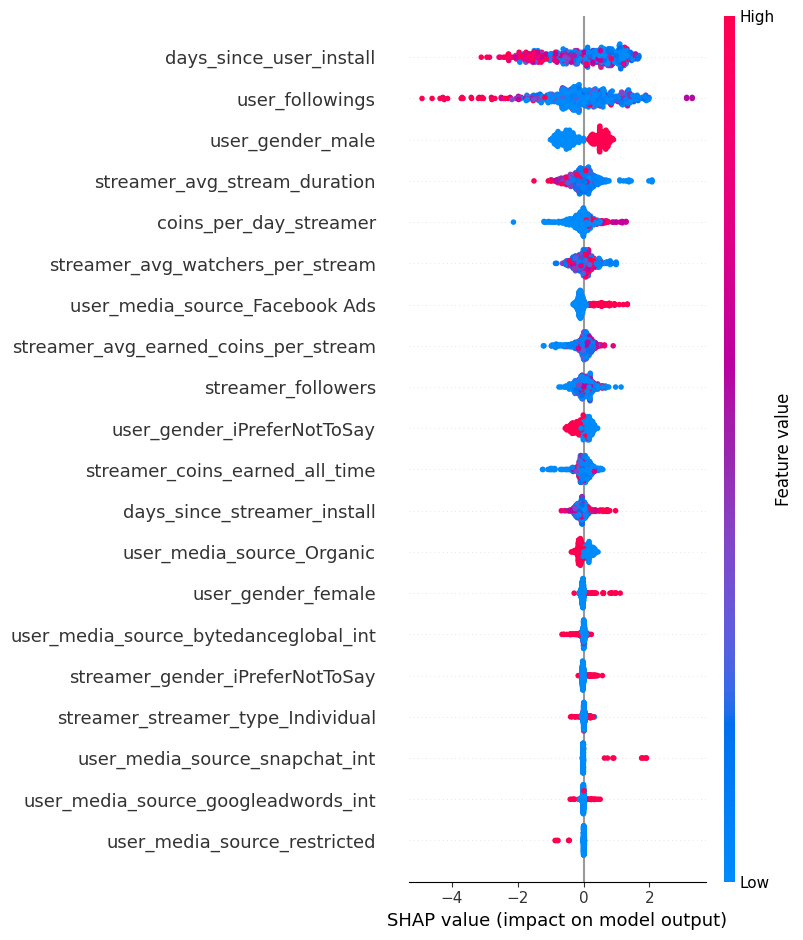

In [12]:
import shap  # Пакет для обчислення SHAP значень
import matplotlib.pyplot as plt

# Створюємо об'єкт TreeExplainer для обчислення SHAP значень
explainer = shap.TreeExplainer(xgb_clf)

# Обчислюємо SHAP значення для тестових даних
shap_values = explainer.shap_values(X_test)

# Створюємо діаграму важливості ознак на основі SHAP значень
shap.summary_plot(shap_values, X_test)


### Аналіз перших 5 ознак на основі SHAP-значень:

1. **days_since_user_install**  
   - Червоні точки зосереджені зліва, що свідчить про те, що користувачі, які нещодавно встановили додаток, мають більшу ймовірність надіслати подарунок.

2. **user_followings**  
   - Червоні точки розташовані ближче до краю зліва, вказуючи, що менша кількість підписок на стрімерів підвищує ймовірність надсилання подарунка.

3. **user_gender_male**  
   - Червоні точки чітко розташовані справа, що означає, що чоловіки значно частіше надсилають подарунки.

4. **streamer_avg_stream_duration**  
   - Червоні точки знаходяться зліва на кінці, що свідчить про те, що коротші стріми підвищують ймовірність отримання подарунків.

5. **coins_per_day_streamer**  
   - Червоні точки розташовані справа, що вказує на те, що стрімери, які заробляють більше монет за день, частіше отримують подарунки.



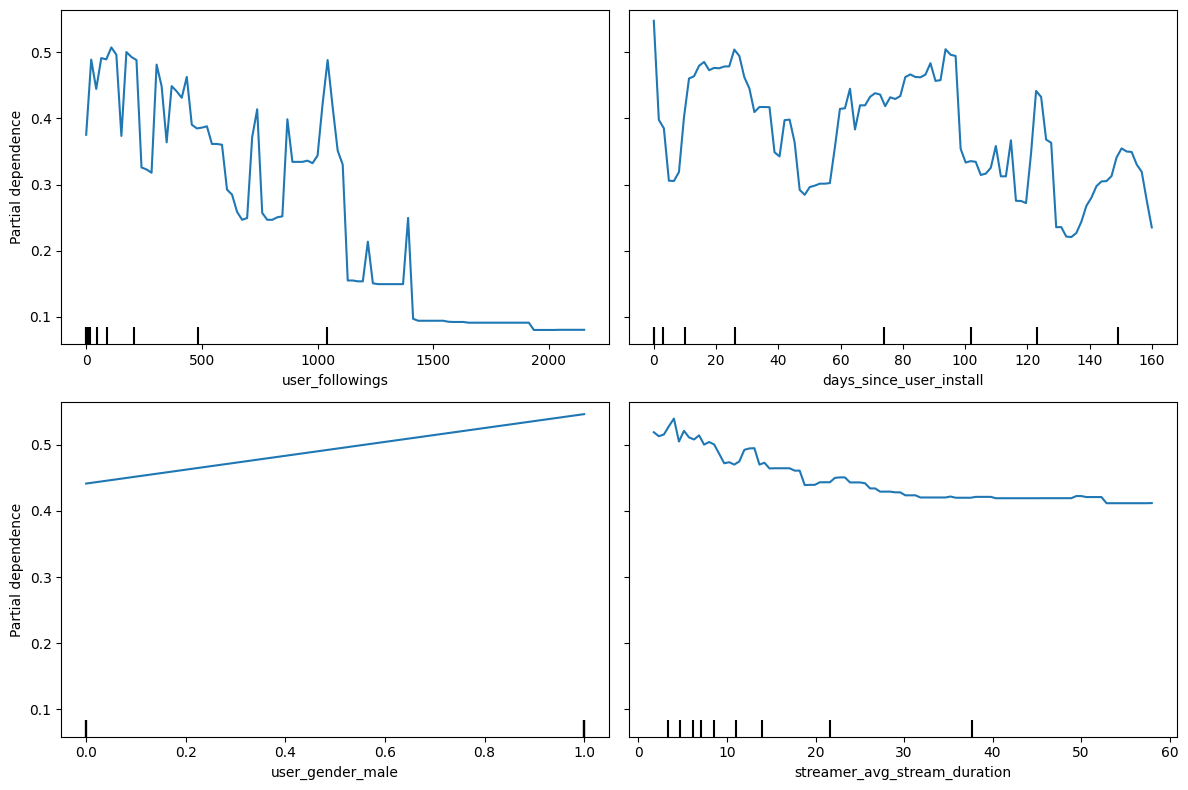

In [13]:
from sklearn.inspection import PartialDependenceDisplay

# Визначаємо перші 4 ознаки, для яких будемо створювати Partial Dependence Plots
features = ['user_followings', 'days_since_user_install', 'user_gender_male', 'streamer_avg_stream_duration']

# Створюємо підграфіки у форматі 2x2
fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 ряди, 2 колонки

# Створюємо Partial Dependence Plots для перших 4 ознак
display = PartialDependenceDisplay.from_estimator(xgb_clf, X_train, features=features, ax=ax)

# Виводимо графіки
plt.tight_layout()
plt.show()


### Аналітика на основі Partial Dependence Plots:

#### 1. **user_followings**:
   - На графіку видно, що при збільшенні кількості підписок користувача, ймовірність відправлення подарунку **знижується**. Користувачі з меншою кількістю підписок мають більш високу ймовірність відправки подарунку (підтверджується графіком SHAP).
   - Відмітка близько **1000 підписок** є критичною, після якої ймовірність значно знижується і стабілізується на дуже низькому рівні.

#### 2. **days_since_user_install**:
   - Графік показує деякі коливання в ймовірності залежно від кількості днів з моменту встановлення додатку. Користувачі, які встановили додаток недавно, мають вищу ймовірність відправлення подарунку, але з часом цей вплив починає коливатися і поступово знижується.
   - Це також підтверджує попередні висновки SHAP, що **нові користувачі** мають більш високу активність.

#### 3. **user_gender_male**:
   - Графік показує, що чоловіки мають **позитивний вплив** на ймовірність відправлення подарунку. Вплив збільшується зі значенням ознаки "чоловік".
   - Це співпадає з SHAP, де було відзначено, що чоловіки частіше відправляють подарунки.

#### 4. **streamer_avg_stream_duration**  
   - Чим коротша середня тривалість стрімів, тим вища ймовірність отримання подарунків. Це особливо помітно до 10-15 хвилин, після чого вплив зменшується і стає стабільним.

### Висновки:
- Загальна тенденція частково підтверджується обома методами аналізу (SHAP та Partial Dependence Plots). Основні закономірності, такі як **негативний вплив великої кількості підписок**, **позитивний вплив чоловічої статі** та **негативний вплив органічного джерела** залишаються сталими.
- Використання обох методів дає повніше розуміння поведінки користувачів і дозволяє робити більш точні висновки для налаштування моделі.
